In [ ]:
! pip install -q kaggle
from google.colab import files

files.upload()

In [0]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/



In [0]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [0]:
! kaggle datasets list

In [0]:
! kaggle competitions download -c 'aptos2019-blindness-detection'

100% 8.00G/8.01G [04:04<00:00, 39.3MB/s]
100% 8.01G/8.01G [04:04<00:00, 35.2MB/s]
 99% 1.49G/1.50G [00:58<00:00, 37.4MB/s]
100% 1.50G/1.50G [00:58<00:00, 27.7MB/s]
  0% 0.00/53.7k [00:00<?, ?B/s]
100% 53.7k/53.7k [00:00<00:00, 47.7MB/s]
  0% 0.00/24.5k [00:00<?, ?B/s]
100% 24.5k/24.5k [00:00<00:00, 19.5MB/s]
  0% 0.00/28.3k [00:00<?, ?B/s]
100% 28.3k/28.3k [00:00<00:00, 24.4MB/s]


In [0]:
! mkdir train

In [0]:
! unzip train_images.zip -d train

In [0]:
from numpy.random import seed
seed(2)
from tensorflow import set_random_seed
set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

1.14.0


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator




Using TensorFlow backend.


In [0]:
import os
blnd_img=list()
for file in os.listdir("/content/train"):
    #if file.endswith(".jpg"):
      #print(1)

        #print(os.path.join('/content/jpg', file))
        img=blnd_img.append(os.path.join("/content/train",file))
        #print(blnd_img)

In [0]:
blnd_df = pd.DataFrame(blnd_img)
blnd_df['colFromIndex'] = blnd_df.index
blnd_df = blnd_df.sort_values([0, 'colFromIndex'])
blnd_df=blnd_df.reset_index()
len(blnd_df)


3662

In [0]:
label_dataframe = pd.read_csv('/content/train.csv')
label_dataframe


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
5,0083ee8054ee,4
6,0097f532ac9f,0
7,00a8624548a9,2
8,00b74780d31d,2
9,00cb6555d108,1


In [0]:
label_dataframe['colFromIndex'] = label_dataframe.index
label_dataframe= label_dataframe.sort_values(['id_code','colFromIndex'])
label_dataframe=label_dataframe.reset_index()
#blnd_df
label_dataframe.head()

,index,id_code,diagnosis,colFromIndex
0,0,000c1434d8d7,2,0
1,1,001639a390f0,4,1
2,2,0024cdab0c1e,1,2
3,3,002c21358ce6,0,3
4,4,005b95c28852,0,4


In [0]:
#from keras.preprocessing.image import img_to_array
i=0
import cv2
import numpy as np
while i<len(blnd_df[0]):
  a=cv2.imread(blnd_df[0][i])
  a=cv2.resize(a,(32,32))
  #a=img_to_array(a)
  #a=np.expand_dims(a,axis=0) 
  #a=a[np.newaxis,:,:]
  #a = a.reshape((1,) + a.shape)
  blnd_df[0][i]=a
  print(i)
  i+=1

In [0]:
blnd_df[1]=label_dataframe['id_code']
blnd_df[2]=label_dataframe['diagnosis']
print(blnd_df.head(5))
print(blnd_df.tail(5))

   index                                                  0  ...             1  2
0   2696  [[[1, 1, 1], [1, 1, 1], [2, 2, 2], [2, 1, 3], ...  ...  000c1434d8d7  2
1   2557  [[[2, 1, 3], [2, 1, 3], [2, 1, 3], [2, 1, 3], ...  ...  001639a390f0  4
2   3556  [[[2, 1, 3], [2, 1, 3], [2, 1, 3], [2, 1, 3], ...  ...  0024cdab0c1e  1
3    635  [[[0, 1, 1], [0, 1, 2], [0, 1, 2], [0, 0, 1], ...  ...  002c21358ce6  0
4     64  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  ...  005b95c28852  0

[5 rows x 5 columns]
      index                                                  0  ...             1  2
3657   2599  [[[1, 0, 2], [1, 1, 1], [1, 1, 1], [2, 2, 2], ...  ...  ffa47f6a7bf4  2
3658   1109  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  ...  ffc04fed30e6  0
3659   2102  [[[2, 1, 3], [0, 0, 1], [2, 1, 3], [2, 2, 2], ...  ...  ffcf7b45f213  2
3660    802  [[[0, 1, 1], [1, 0, 2], [0, 1, 2], [1, 0, 2], ...  ...  ffd97f8cd5aa  0
3661   2227  [[[6, 4, 4], [6, 4, 4], [6, 4, 4], [6, 4, 4], ..

In [0]:
from sklearn.model_selection import train_test_split
train_img_blnd, test_img_blnd, train_label_blnd, test_label_blnd = train_test_split(blnd_df[0], blnd_df[2], test_size=0.2)

In [0]:
train=np.save('/content/train', np.stack(train_img_blnd,axis=0))
test=np.save('/content/test', np.stack(test_img_blnd,axis=0))

In [0]:
train_img_blnd=np.load('/content/train.npy')
test_img_blnd = np.load('/content/test.npy')
train_img_blnd.shape


(2929, 32, 32, 3)

In [0]:
train_img_blnd=train_img_blnd.astype('float32')/255
test_img_blnd=test_img_blnd.astype('float32')/255

In [0]:
train_label_blnd=train_label_blnd.astype('category')
dummies_train= pd.get_dummies(train_label_blnd)
dummies_train.head()

,0,1,2,3,4
3516,1,0,0,0,0
514,0,1,0,0,0
1974,1,0,0,0,0
1152,1,0,0,0,0
221,1,0,0,0,0


In [0]:
test_label_blnd=test_label_blnd.astype('category')
dummies_test= pd.get_dummies(test_label_blnd)
dummies_test.head()

,0,1,2,3,4
749,1,0,0,0,0
2911,0,1,0,0,0
3243,0,0,0,1,0
341,0,0,0,1,0
280,0,0,1,0,0


In [0]:
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_img_blnd.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(700))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
# Output classes are 30
    model.add(Dense(5))
    model.add(Activation('softmax'))

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [0]:
history = model.fit(train_img_blnd, dummies_train, batch_size=128, validation_data = (test_img_blnd, dummies_test), epochs=15)

W0715 18:42:21.288826 140126437959552 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 2929 samples, validate on 733 samples
Epoch 1/15
2929/2929 [==============================] - 12s 4ms/step - loss: 1.2711 - acc: 0.4954 - val_loss: 1.1491 - val_acc: 0.6576
Epoch 2/15
2929/2929 [==============================] - 12s 4ms/step - loss: 0.9572 - acc: 0.6753 - val_loss: 0.8409 - val_acc: 0.6958
Epoch 3/15
2929/2929 [==============================] - 11s 4ms/step - loss: 0.8348 - acc: 0.6961 - val_loss: 0.8024 - val_acc: 0.6944
Epoch 4/15
2929/2929 [==============================] - 11s 4ms/step - loss: 0.8075 - acc: 0.7081 - val_loss: 0.7703 - val_acc: 0.7135
Epoch 5/15
2929/2929 [==============================] - 11s 4ms/step - loss: 0.7907 - acc: 0.7125 - val_loss: 0.7636 - val_acc: 0.7094
Epoch 6/15
2929/2929 [==============================] - 11s 4ms/step - loss: 0.7651 - acc: 0.7238 - val_loss: 0.7475 - val_acc: 0.7121
Epoch 7/15
2929/2929 [==============================] - 11s 4ms/step - loss: 0.7532 - acc: 0.7289 - val_loss: 0.7480 - val_acc: 0.7121
Epoch 8/

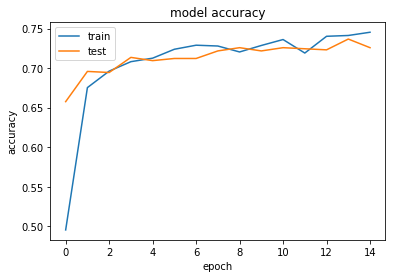

In [0]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

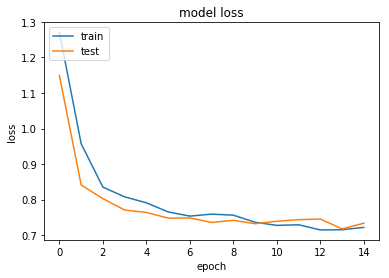

In [0]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
print(max(history.history["acc"]))
print(max(history.history["val_acc"]))

0.7453055655073085
0.7366985005376121


In [0]:
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_img_blnd.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(32,(3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(32, (3,3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(900))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
# Output classes are 10
    model.add(Dense(5))
    model.add(Activation('softmax'))

model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [0]:
b_history = model.fit(train_img_blnd, dummies_train, batch_size=128, validation_data = (test_img_blnd, dummies_test), epochs=15)

Train on 2929 samples, validate on 733 samples
Epoch 1/15
2929/2929 [==============================] - 20s 7ms/step - loss: 1.2155 - acc: 0.5968 - val_loss: 0.9410 - val_acc: 0.6876
Epoch 2/15
2929/2929 [==============================] - 18s 6ms/step - loss: 0.9181 - acc: 0.6832 - val_loss: 0.9996 - val_acc: 0.6985
Epoch 3/15
2929/2929 [==============================] - 18s 6ms/step - loss: 0.8416 - acc: 0.6948 - val_loss: 0.8038 - val_acc: 0.7135
Epoch 4/15
2929/2929 [==============================] - 18s 6ms/step - loss: 0.7750 - acc: 0.7248 - val_loss: 0.7608 - val_acc: 0.7312
Epoch 5/15
2929/2929 [==============================] - 18s 6ms/step - loss: 0.7423 - acc: 0.7347 - val_loss: 0.7541 - val_acc: 0.7326
Epoch 6/15
2929/2929 [==============================] - 18s 6ms/step - loss: 0.7303 - acc: 0.7289 - val_loss: 0.7784 - val_acc: 0.7176
Epoch 7/15
2929/2929 [==============================] - 18s 6ms/step - loss: 0.7228 - acc: 0.7371 - val_loss: 0.7336 - val_acc: 0.7353
Epoch 8/

In [0]:
print(max(b_history.history["acc"]))
print(max(b_history.history["val_acc"]))

0.7733014689732347
0.7421555264584853


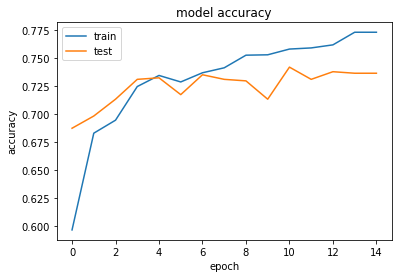

In [0]:
plt.plot(b_history.history["acc"])
plt.plot(b_history.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

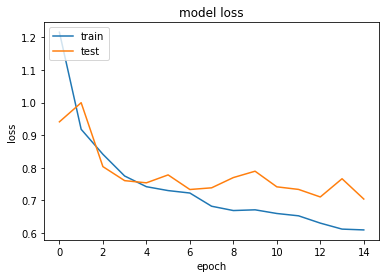

In [0]:
plt.plot(b_history.history["loss"])
plt.plot(b_history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()